In [1]:
library(memisc)
data <- as.data.set(spss.system.file("nmtwins.sav"))
data <- as.data.frame(data)
data <- data[complete.cases(data), ]


 要求されたパッケージ lattice をロード中です 

 要求されたパッケージ MASS をロード中です 


 次のパッケージを付け加えます: ‘memisc’ 


 以下のオブジェクトは ‘package:stats’ からマスクされています: 

     contr.sum, contr.treatment, contrasts 


 以下のオブジェクトは ‘package:base’ からマスクされています: 

     as.array 


File character set is 'ASCII'.

Converting character set to the local 'utf-8'.



In [2]:
data


,pairnum,sex,zygosity,moed,faed,faminc,english,math,socsci,natsci,vocab
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,1,3,4,2,14,13,17,18,14
2,1,2,1,3,4,2,11,14,15,10,12
3,4,2,1,1,1,1,20,20,16,16,13
4,4,2,1,1,1,1,17,19,13,13,14
5,5,2,1,1,1,1,11,8,15,16,12
6,5,2,1,1,1,1,16,13,13,8,15
7,7,1,2,3,2,4,9,19,7,10,6
8,7,1,2,3,2,4,8,16,15,17,11
9,10,1,2,5,4,3,15,23,23,21,21


In [3]:
sum(data[, c("english", "math")])


[1] 62994

In [4]:
# 双子間の点数差
get_diffs <- function(subject) {
    diffs <- c()
    for (i in 1:as.integer(length(data[, 1]) / 2)) {
        diff <- data[2 * i - 1, subject] - data[2 * i, subject]
        diff <- abs(diff)
        diffs <- c(diffs, diff)
    }
    return(diffs)
}


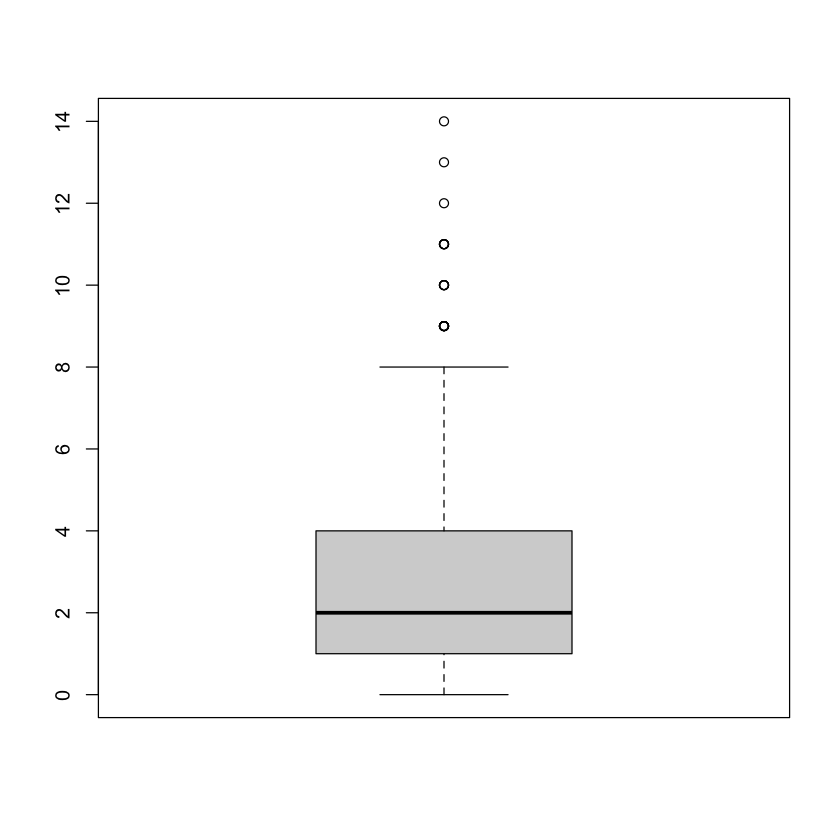

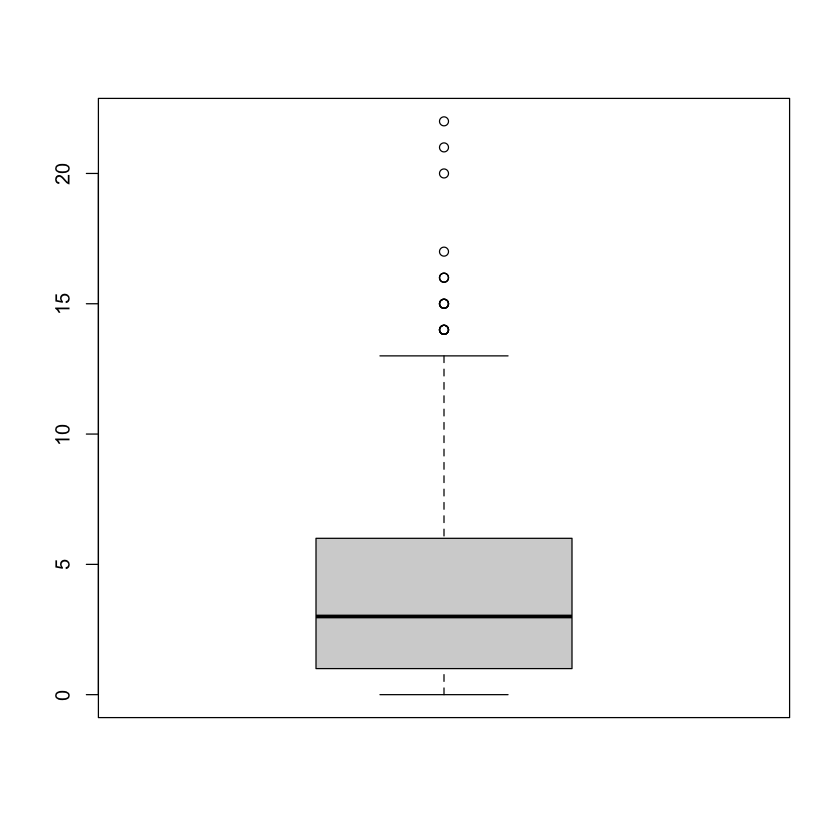

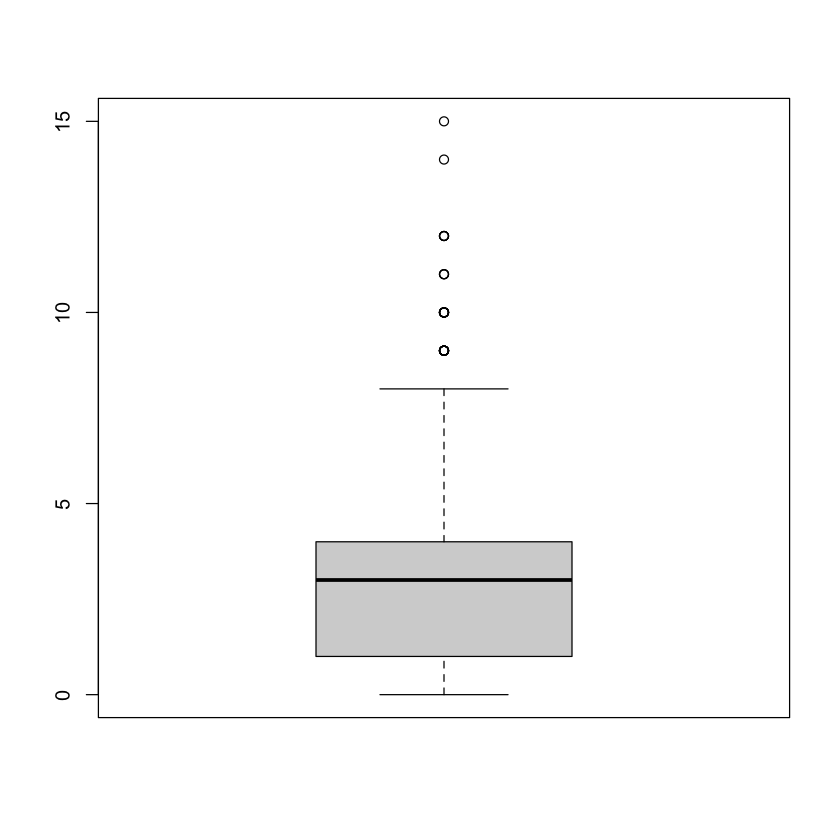

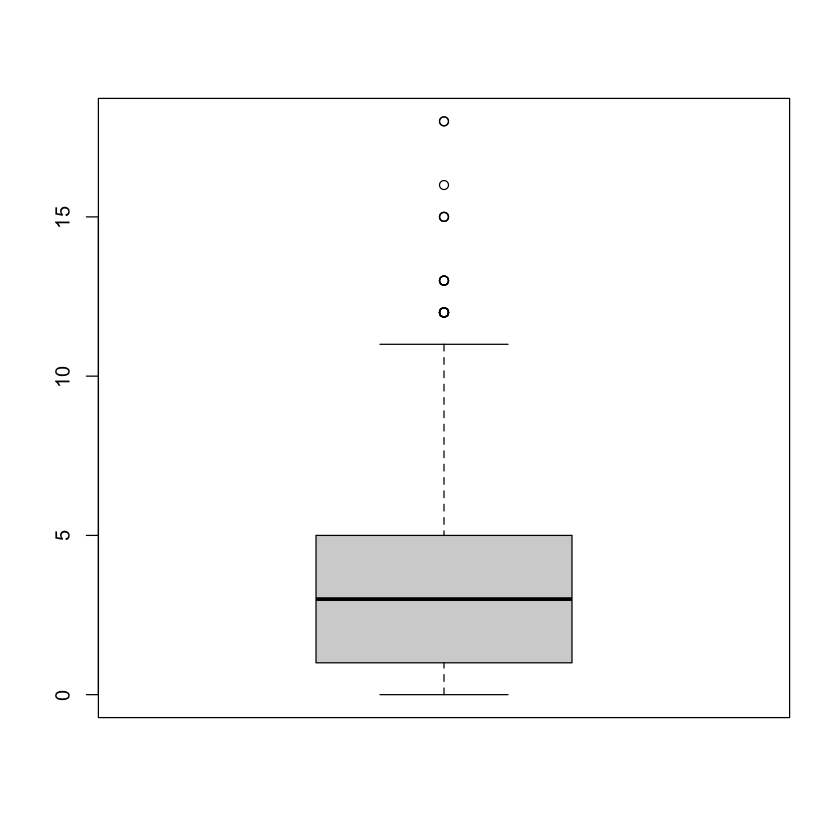

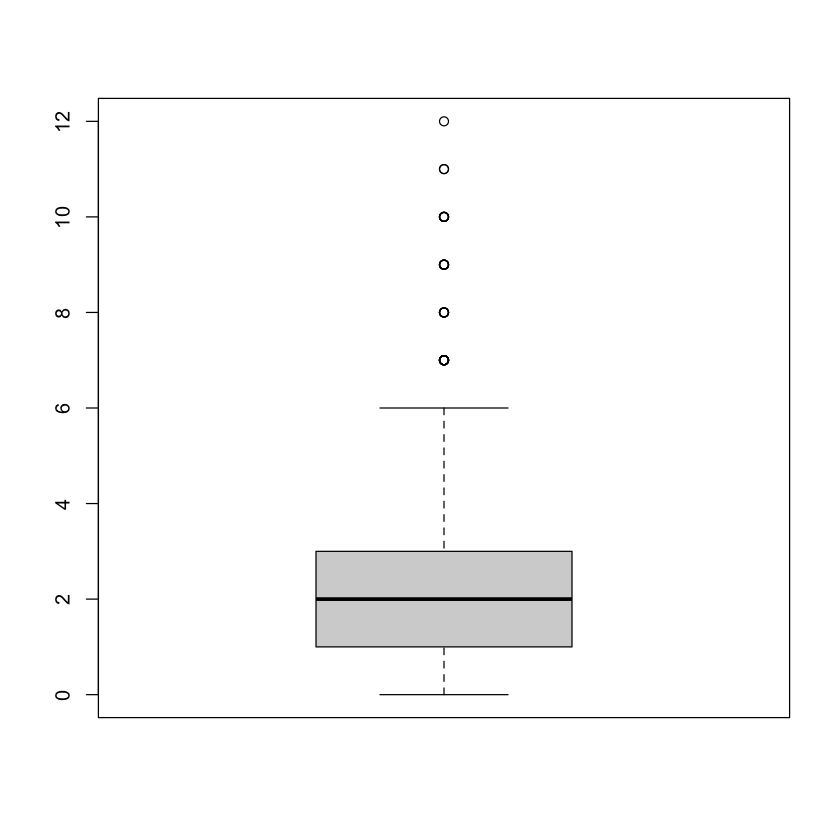

In [5]:
for (subject in c("english", "math", "socsci", "natsci", "vocab")) {
    boxplot(get_diffs(subject))
}


In [6]:
get_twins <- function(subject) {
    num_twins <- as.integer(length(data[, 1]) / 2)
    twins <- matrix(0, nrow = num_twins, ncol = 2)
    for (i in 1:num_twins) {
        # 奇数番目が1つ目、偶数番目が2つ目に入る
        twin <- c(data[2 * i - 1, subject], data[2 * i, subject])
        twins[i, ] <- twin
    }
    return(twins)
}


In [7]:
cor(get_twins("math"))


1.0000000,0.6468414
0.6468414,1.0000000


In [8]:
get_one_twins <- function(subject) {
    num_twins <- as.integer(length(data[, 1]) / 2)
    one_twins <- data.frame()
    for (i in 1:num_twins) {
        # 奇数番目が1つ目、偶数番目が2つ目に入る
        if (data[2 * i, "zygosity"] != 1) {
            next
        }
        twin <- c(data[2 * i - 1, subject], data[2 * i, subject])
        one_twins <- rbind(one_twins, twin)
    }
    return(one_twins)
}


In [9]:
get_two_twins <- function(subject) {
    num_twins <- as.integer(length(data[, 1]) / 2)
    two_twins <- data.frame()
    for (i in 1:num_twins) {
        # 奇数番目が1つ目、偶数番目が2つ目に入る
        if (data[2 * i, "zygosity"] != 2) {
            next
        }
        twin <- c(data[2 * i - 1, subject], data[2 * i, subject])
        two_twins <- rbind(two_twins, twin)
    }
    return(two_twins)
}


In [10]:
jpeg("./two_twin_plots/math.jpg", width = 800, height = 800, pointsize = 20)
plot(get_two_twins("math"))
dev.off()


pdf 
  2

In [11]:
cor(get_two_twins("math"))


,X19,X16
X19,1.0000000,0.4938087
X16,0.4938087,1.0000000


In [14]:
data.pc <- princomp(data[7:11])


In [18]:
summary(data.pc)


Importance of components:
                         Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     9.918813 4.0736321 3.35238377 2.93207343 2.22615435
Proportion of Variance 0.703898 0.1187282 0.08040772 0.06150919 0.03545691
Cumulative Proportion  0.703898 0.8226262 0.90303391 0.96454309 1.00000000

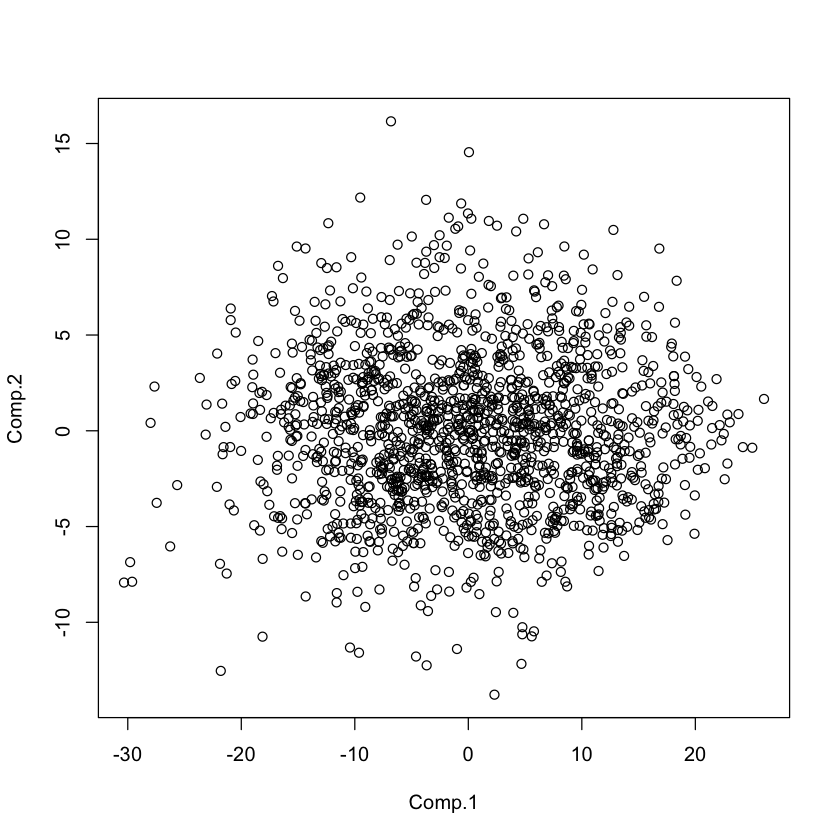

In [22]:
plot(data.pc$scores)


In [43]:
pairs = data.frame()
for (i in 1:838) {
    pairs <- rbind(pairs, c(data.pc$scores[2 * i - 1], data.pc$scores[2 * i]))
}
pairs


X.11.9330179076784,X.18.0432632675521
<dbl>,<dbl>
-11.9330179,-18.043263
-7.7497177,-11.733058
-18.3470891,-17.404541
-21.8077058,-15.016699
0.6024033,-10.311578
-11.7281762,-8.697934
8.4209091,10.177455
20.5235787,16.286062
2.8302845,7.903895


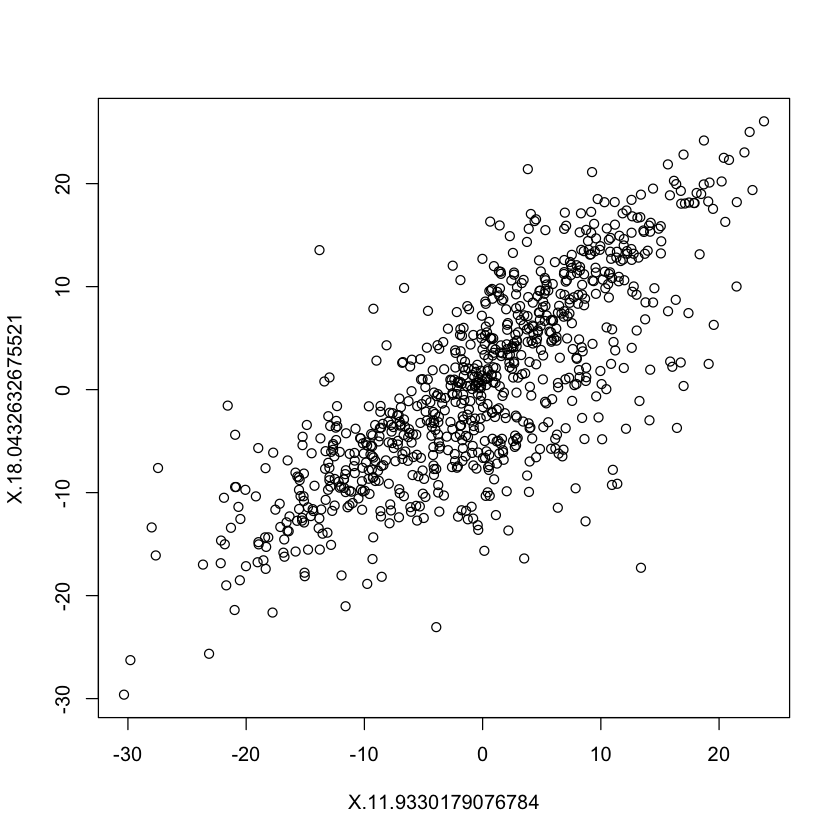

In [44]:
plot(pairs)